# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [7]:
df = pd.read_csv('/content/dataset_baru.csv', sep=';')
df.head()

,ID Variant,Category,Items Name,Brand Name,Basic - Price,In Stock,Track Stock,Track Alert,Track Cost,Cost Amount
0,97069882,tembakau mole,madu gold,Unbranded,8000,1,Yes,Yes,Yes,5000.0
1,97069889,tembakau mole,madu prima,Unbranded,13000,1,Yes,Yes,Yes,8600.0
2,97069893,tembakau mole,madu silver,Unbranded,13000,1,Yes,Yes,Yes,8600.0
3,97071033,tembakau mole,gunting kuning kecil,Unbranded,8000,10,Yes,Yes,Yes,5212.0
4,97254100,rokok sampoerna,sampoerna mild 12,Unbranded,25000,4,Yes,Yes,Yes,23828.0


# Preprocessing

In [62]:
df = df[['Items Name', 'Category', 'Basic - Price', 'Cost Amount', 'In Stock']]
df.head()

,Items Name,Category,Basic - Price,Cost Amount,In Stock
0,madu gold,tembakau mole,8000,5000.0,1
1,madu prima,tembakau mole,13000,8600.0,1
2,madu silver,tembakau mole,13000,8600.0,1
3,gunting kuning kecil,tembakau mole,8000,5212.0,10
4,sampoerna mild 12,rokok sampoerna,25000,23828.0,4


In [63]:
df.isna().sum()

,0
Items Name,0
Category,0
Basic - Price,0
Cost Amount,0
In Stock,0


In [64]:
df = df.dropna()

In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.isna().sum()

,0
Items Name,0
Category,0
Basic - Price,0
Cost Amount,0
In Stock,0


# Feature Engineering

In [16]:
df.loc[df['In Stock'] < 0, 'In Stock'] = 0

In [17]:
df['Margin_Rp'] = df['Basic - Price'] - df['Cost Amount']

In [18]:
df['Margin_Persen'] = (df['Margin_Rp'] / df['Cost Amount']) * 100

In [19]:
df['Total_Aset'] = df['In Stock'] * df['Cost Amount']

In [20]:
analisis_kategori = df.groupby('Category')[['Margin_Rp', 'Total_Aset', 'In Stock']].sum().sort_values(by='Margin_Rp', ascending=False)

# EDA

In [45]:
print('Statisik Deskriptif\n')
print(df[['Margin_Rp', 'Total_Aset']].describe())

Statisik Deskriptif

          Margin_Rp    Total_Aset
count    575.000000  5.750000e+02
mean    5042.050435  4.786581e+04
std     5380.396725  1.601543e+05
min    -2000.000000  0.000000e+00
25%     1466.000000  0.000000e+00
50%     3000.000000  0.000000e+00
75%     6500.000000  5.455150e+04
max    29000.000000  3.235650e+06


In [46]:
print('Hubungan Antar Variabel\n')
print(df[['Basic - Price', 'Cost Amount', 'Margin_Rp']].corr())

Hubungan Antar Variabel

               Basic - Price  Cost Amount  Margin_Rp
Basic - Price       1.000000     0.885803   0.664915
Cost Amount         0.885803     1.000000   0.242368
Margin_Rp           0.664915     0.242368   1.000000


In [49]:
analisis_kategori = df.groupby('Category').agg({
    'Items Name': 'count',
    'Margin_Rp': 'mean',
    'Total_Aset': 'sum'
}).sort_values(by='Margin_Rp', ascending=False)

analisis_kategori = analisis_kategori.rename(columns={
    'Items Name': 'Jumlah Varian',
    'Margin_Rp': 'Rata2 Cuan (Rp)',
    'Total_Aset': 'Total Aset (Rp)'
})

print("Performa Per Kategori (Top 10)\n")
print(analisis_kategori.head(10))

Performa Per Kategori (Top 10)

                   Jumlah Varian  Rata2 Cuan (Rp)  Total Aset (Rp)
Category                                                          
tembakau original            106     10631.839623              0.0
tembakau rokok                23     10504.347826              0.0
filter                        25      8852.440000              0.0
accessories                   36      8620.250000        1582269.0
alat linting                   9      7302.666667         524342.0
tembakau rasa                 42      6225.000000              0.0
tembakau sw                    4      4000.000000              0.0
cerutu                        20      3977.150000        1255565.0
tembakau mole                 31      2911.193548        1630685.0
rokok djisamsoe                4      2841.250000         202730.0


In [54]:
def buat_kategori_cuan(rupiah):
    if rupiah > 10000:
        return 'Produk Premium (High Margin)'
    elif rupiah >= 5000:
        return 'Produk Standar (Medium Margin)'
    else:
        return 'Produk Receh (Low Margin)'

df['Kelas_Produk'] = df['Margin_Rp'].apply(buat_kategori_cuan)

print("Sebaran Kelas Produk\n")
print(df['Kelas_Produk'].value_counts())

print("\nContoh Produk Premium")
print(df[df['Kelas_Produk'] == 'Produk Premium (High Margin)'][['Items Name', 'Margin_Rp']].head(3))

Sebaran Kelas Produk

Kelas_Produk
Produk Receh (Low Margin)         378
Produk Standar (Medium Margin)    120
Produk Premium (High Margin)       77
Name: count, dtype: int64

Contoh Produk Premium
    Items Name  Margin_Rp
29  gayo hijau    10750.0
30  gayo hijau    19500.0
33     kemloko    12400.0


# Visualisasi

In [55]:
def klasifikasi(rupiah):
    if rupiah > 10000: return 'Premium (>10rb)'
    elif rupiah >= 5000: return 'Standar (5-10rb)'
    else: return 'Receh (<5rb)'

df['Kelas_Produk'] = df['Margin_Rp'].apply(klasifikasi)

/tmp/ipython-input-1275988430.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_bar.values, y=data_bar.index, palette='viridis', ax=ax2)


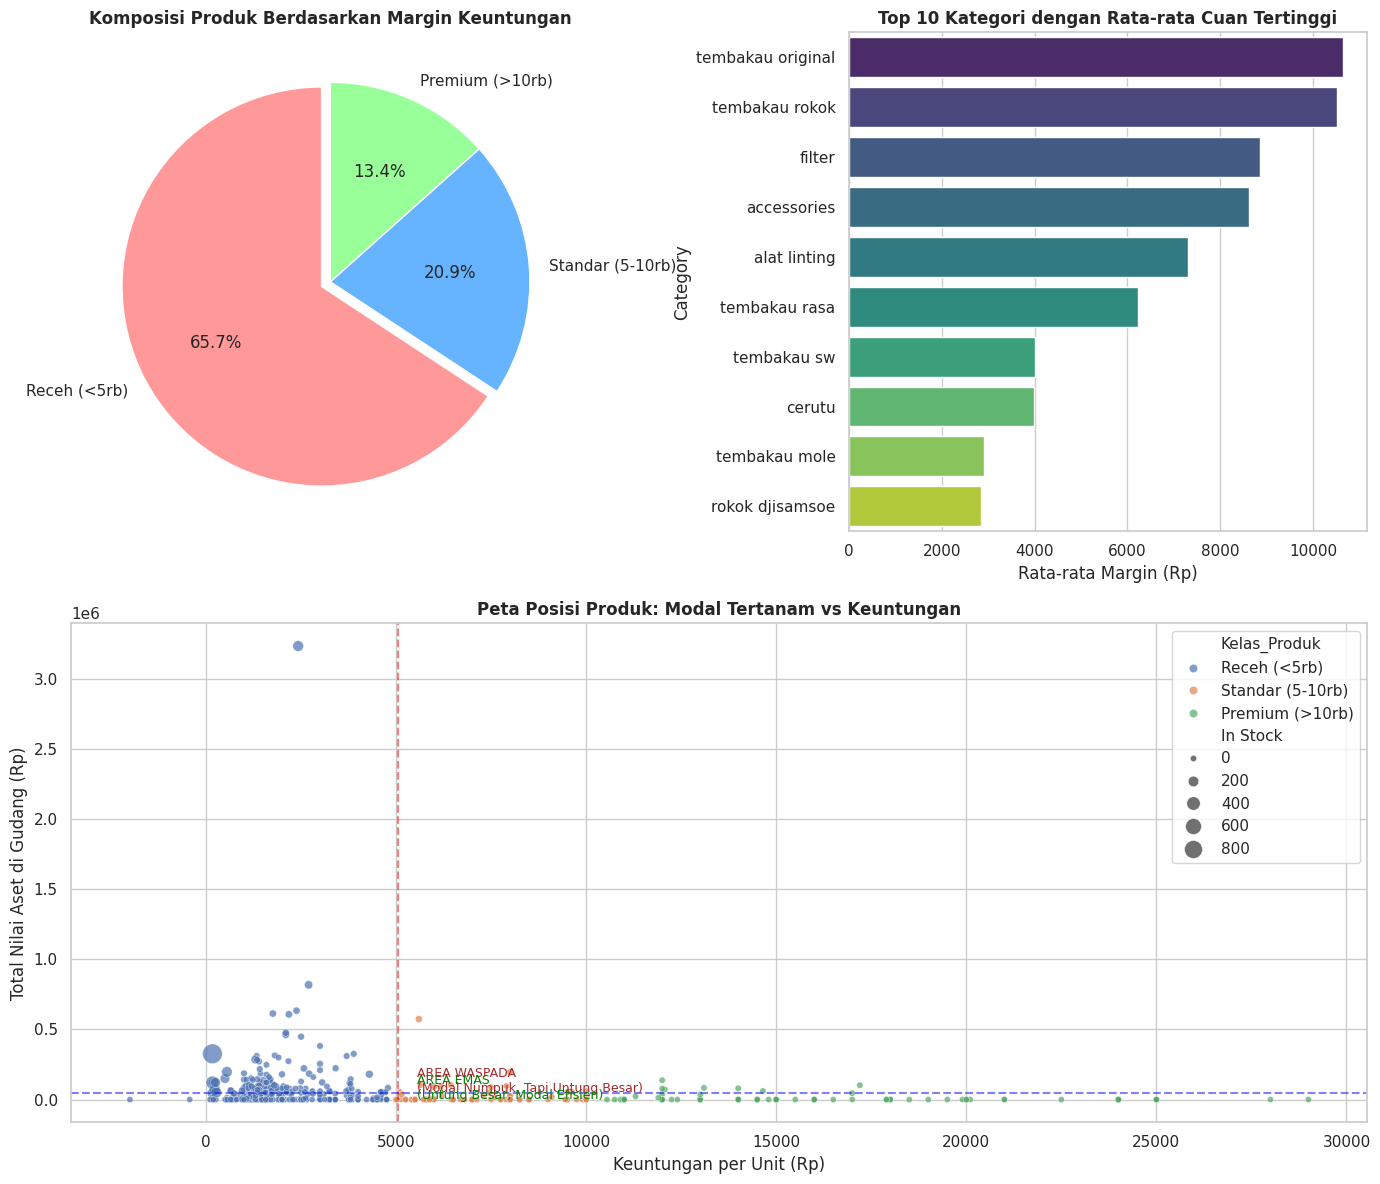

In [61]:
# Membuat Visualisasi Dashboard
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(14, 12))

# Layout Grid
gs = fig.add_gridspec(2, 2)

# CHART 1: Proporsi Kelas Produk
ax1 = fig.add_subplot(gs[0, 0])
data_pie = df['Kelas_Produk'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99']
ax1.pie(data_pie, labels=data_pie.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0, 0))
ax1.set_title('Komposisi Produk Berdasarkan Margin Keuntungan', fontweight='bold')

# CHART 2: Rata-rata Cuan Per Kategori
ax2 = fig.add_subplot(gs[0, 1])
data_bar = df.groupby('Category')['Margin_Rp'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=data_bar.values, y=data_bar.index, palette='viridis', ax=ax2)
ax2.set_title('Top 10 Kategori dengan Rata-rata Cuan Tertinggi', fontweight='bold')
ax2.set_xlabel('Rata-rata Margin (Rp)')

# CHART 3: Peta Aset VS Margin
ax3 = fig.add_subplot(gs[1, :])
sns.scatterplot(data=df, x='Margin_Rp', y='Total_Aset', hue='Kelas_Produk', size='In Stock', sizes=(20, 200), alpha=0.7, ax=ax3)

# Garis Rata-rata
avg_margin = df['Margin_Rp'].mean()
avg_asset = df['Total_Aset'].mean()
ax3.axvline(avg_margin, color='red', linestyle='--', alpha=0.5)
ax3.axhline(avg_asset, color='blue', linestyle='--', alpha=0.5)

ax3.set_title('Peta Posisi Produk: Modal Tertanam vs Keuntungan', fontweight='bold')
ax3.set_xlabel('Keuntungan per Unit (Rp)')
ax3.set_ylabel('Total Nilai Aset di Gudang (Rp)')
ax3.text(avg_margin*1.1, avg_asset*1.1, 'AREA WASPADA\n(Modal Numpuk, Tapi Untung Besar)', color='brown', fontsize=9)
ax3.text(avg_margin*1.1, avg_asset*0.1, 'AREA EMAS\n(Untung Besar, Modal Efisien)', color='green', fontsize=9)

plt.tight_layout()
plt.show()